<a href="https://colab.research.google.com/github/adnanowaiss/hello-world/blob/master/twtter_sent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import json
from wordcloud import WordCloud,STOPWORDS 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
import io
from google.colab import files
uploaded = files.upload()     

Saving twitter_data.txt to twitter_data.txt


In [0]:
list_tweets = []
with open('twitter_data.txt','r') as td:
    for lin in td:
        try:
            lin = lin.strip()
            line = json.loads(lin)
            if type(line) is dict:
                list_tweets.append(line)
        except:
            pass

In [0]:
total_tweets = len(list_tweets)

In [0]:
df = pd.DataFrame(list_tweets)

In [0]:
df.head(1)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_entities
0,Tue May 28 04:35:29 +0000 2019,1133230289088499713,1133230289088499713,"अभी तक #मीडिया थोड़ा छुप के प्रचार कर रही थी, ...","<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,None,None,"{'id': 1103697647561400320, 'id_str': '1103697...",None,None,None,None,False,{'full_text': 'अभी तक #मीडिया थोड़ा छुप के प्र...,0,0,0,0,"{'hashtags': [{'text': 'मीडिया', 'indices': [7...",False,False,low,hi,1559018129976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.drop(['contributors','coordinates'],axis=1,inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10890 entries, 0 to 10889
Data columns (total 34 columns):
created_at                   10890 non-null object
id                           10890 non-null int64
id_str                       10890 non-null object
text                         10890 non-null object
source                       10890 non-null object
truncated                    10890 non-null bool
in_reply_to_status_id        929 non-null float64
in_reply_to_status_id_str    929 non-null object
in_reply_to_user_id          1081 non-null float64
in_reply_to_user_id_str      1081 non-null object
in_reply_to_screen_name      1081 non-null object
user                         10890 non-null object
geo                          2 non-null object
place                        105 non-null object
is_quote_status              10890 non-null bool
extended_tweet               1349 non-null object
quote_count                  10890 non-null int64
reply_count                  10890 non-nul

In [0]:
count = pd.DataFrame(pd.value_counts(df['lang'])).reset_index()
count

,index,lang
0,en,7669
1,hi,2002
2,es,285
3,ja,208
4,und,164
5,ta,81
6,pt,76
7,in,72
8,tl,70
9,sv,63


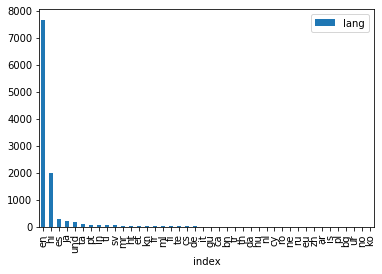

In [0]:
count.plot(kind='bar',x='index' )

In [0]:
df_final = df[df['lang'] == 'en']

In [0]:
df_final

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,place,is_quote_status,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_entities
1,Tue May 28 04:35:30 +0000 2019,1133230291378683905,1133230291378683905,RT @CREWcrew: Whispers of money laundering hav...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,None,NaN,None,None,"{'id': 20307500, 'id_str': '20307500', 'name':...",None,None,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559018130522,{'created_at': 'Tue May 28 04:00:11 +0000 2019...,False,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue May 28 04:35:30 +0000 2019,1133230291617603584,1133230291617603584,RT @KanchanGupta: Congress voteshare was highe...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,None,"{'id': 635423910, 'id_str': '635423910', 'name...",None,None,True,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,1559018130579,{'created_at': 'Mon May 27 20:19:18 +0000 2019...,NaN,1.133080e+18,1133079967330394112,{'created_at': 'Mon May 27 18:38:10 +0000 2019...,"{'url': 'https://t.co/swwt4F3JOF', 'expanded':...",NaN,NaN
4,Tue May 28 04:35:31 +0000 2019,1133230293928665088,1133230293928665088,@RahulEaswar Why you not tweeted about UDF pro...,"<a href=""http://twitter.com/download/android"" ...",True,1.133229e+18,1133229296393211904,5.720785e+07,57207846,RahulEaswar,"{'id': 3314351030, 'id_str': '3314351030', 'na...",None,None,False,{'full_text': '@RahulEaswar Why you not tweete...,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559018131130,NaN,NaN,NaN,NaN,NaN,NaN,"[13, 140]",NaN
7,Tue May 28 04:35:31 +0000 2019,1133230294545444869,1133230294545444869,@maidros78 Much wrong with this article.\n1. 9...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.132962e+18,1132961984436088832,2.151831e+09,2151830718,maidros78,"{'id': 1552108188, 'id_str': '1552108188', 'na...",None,None,False,{'full_text': '@maidros78 Much wrong with this...,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559018131277,NaN,NaN,NaN,NaN,NaN,NaN,"[11, 140]",NaN
8,Tue May 28 04:35:31 +0000 2019,1133230295488970752,1133230295488970752,RT @CREWcrew: Whispers of money laundering hav...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,None,NaN,None,None,"{'id': 3366005779, 'id_str': '3366005779', 'na...",None,None,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559018131502,{'created_at': 'Tue May 28 04:00:11 +0000 2019...,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10882,Tue May 28 05:47:05 +0000 2019,1133248305687801856,1133248305687801856,RT @rishibagree: Love the way the young BJP le...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,None,NaN,None,None,"{'id': 1350016700, 'id_str': '1350016700', 'na...",None,None,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,1559022425468,{'created_at': 'Tue May 28 05:08:13 +0000 2019...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10885,Tue May 28 05:47:05 +0000 2019,1133248306220556288,1133248306220556288,Former interior minister &amp; Senate Standing...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,None,None,"{'id': 993454242, 'id_str': '993454242', 'name...",None,None,False,{'full_text': 'Former interior minister &amp; ...,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559022425595,NaN,False,NaN,NaN,NaN,NaN,"[0, 140]",NaN
10886

In [0]:
df_final['created_at'] = pd.to_datetime(df_final.created_at)

In [0]:
df_final

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,place,is_quote_status,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_entities
1,2019-05-28 04:35:30+00:00,1133230291378683905,1133230291378683905,RT @CREWcrew: Whispers of money laundering hav...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,None,NaN,None,None,"{'id': 20307500, 'id_str': '20307500', 'name':...",None,None,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559018130522,{'created_at': 'Tue May 28 04:00:11 +0000 2019...,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-28 04:35:30+00:00,1133230291617603584,1133230291617603584,RT @KanchanGupta: Congress voteshare was highe...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,None,"{'id': 635423910, 'id_str': '635423910', 'name...",None,None,True,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,1559018130579,{'created_at': 'Mon May 27 20:19:18 +0000 2019...,NaN,1.133080e+18,1133079967330394112,{'created_at': 'Mon May 27 18:38:10 +0000 2019...,"{'url': 'https://t.co/swwt4F3JOF', 'expanded':...",NaN,NaN
4,2019-05-28 04:35:31+00:00,1133230293928665088,1133230293928665088,@RahulEaswar Why you not tweeted about UDF pro...,"<a href=""http://twitter.com/download/android"" ...",True,1.133229e+18,1133229296393211904,5.720785e+07,57207846,RahulEaswar,"{'id': 3314351030, 'id_str': '3314351030', 'na...",None,None,False,{'full_text': '@RahulEaswar Why you not tweete...,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559018131130,NaN,NaN,NaN,NaN,NaN,NaN,"[13, 140]",NaN
7,2019-05-28 04:35:31+00:00,1133230294545444869,1133230294545444869,@maidros78 Much wrong with this article.\n1. 9...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.132962e+18,1132961984436088832,2.151831e+09,2151830718,maidros78,"{'id': 1552108188, 'id_str': '1552108188', 'na...",None,None,False,{'full_text': '@maidros78 Much wrong with this...,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559018131277,NaN,NaN,NaN,NaN,NaN,NaN,"[11, 140]",NaN
8,2019-05-28 04:35:31+00:00,1133230295488970752,1133230295488970752,RT @CREWcrew: Whispers of money laundering hav...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,None,NaN,None,None,"{'id': 3366005779, 'id_str': '3366005779', 'na...",None,None,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559018131502,{'created_at': 'Tue May 28 04:00:11 +0000 2019...,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10882,2019-05-28 05:47:05+00:00,1133248305687801856,1133248305687801856,RT @rishibagree: Love the way the young BJP le...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,None,NaN,None,None,"{'id': 1350016700, 'id_str': '1350016700', 'na...",None,None,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,1559022425468,{'created_at': 'Tue May 28 05:08:13 +0000 2019...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10885,2019-05-28 05:47:05+00:00,1133248306220556288,1133248306220556288,Former interior minister &amp; Senate Standing...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,None,None,"{'id': 993454242, 'id_str': '993454242', 'name...",None,None,False,{'full_text': 'Former interior minister &amp; ...,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,en,1559022425595,NaN,False,NaN,NaN,NaN,NaN,"[0, 140]",NaN
10886,2019-05-28 05:47:06+00:00,11332483

In [0]:
print(df_final.display_text_range.isna().sum())
len(df_final.display_text_range)
df_final.drop('display_text_range',inplace = True,axis=1)

AttributeError: ignored

In [0]:
print(df_final.extended_entities.isna().sum())
len(df_final.extended_entities)
df_final.drop('extended_entities',inplace = True,axis=1)

7505


In [0]:
print(df_final.favorite_count.sum())
len(df_final.favorite_count)
df_final.drop('favorite_count',inplace = True,axis=1)


0


In [0]:
print(df_final.favorited.sum())
len(df_final.favorited)
df_final.drop('favorited',inplace = True,axis=1)

0


In [0]:
df_final.drop(['filter_level','geo','id','id_str','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str'],inplace = True,axis=1)
df_final.drop(['in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status'],inplace=True,axis=1)


In [0]:
df_final.place.isna().sum()
len(df_final.place)
df_final.drop(['place','possibly_sensitive','quote_count','quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_permalink'],inplace = True,axis=1)

In [0]:
df_final.drop(['reply_count','retweet_count','retweeted'],inplace=True,axis=1)
df_final

,created_at,text,source,truncated,user,extended_tweet,entities,lang,timestamp_ms,retweeted_status
1,2019-05-28 04:35:30+00:00,RT @CREWcrew: Whispers of money laundering hav...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 20307500, 'id_str': '20307500', 'name':...",NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",en,1559018130522,{'created_at': 'Tue May 28 04:00:11 +0000 2019...
2,2019-05-28 04:35:30+00:00,RT @KanchanGupta: Congress voteshare was highe...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 635423910, 'id_str': '635423910', 'name...",NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1559018130579,{'created_at': 'Mon May 27 20:19:18 +0000 2019...
4,2019-05-28 04:35:31+00:00,@RahulEaswar Why you not tweeted about UDF pro...,"<a href=""http://twitter.com/download/android"" ...",True,"{'id': 3314351030, 'id_str': '3314351030', 'na...",{'full_text': '@RahulEaswar Why you not tweete...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",en,1559018131130,NaN
7,2019-05-28 04:35:31+00:00,@maidros78 Much wrong with this article.\n1. 9...,"<a href=""http://twitter.com/download/iphone"" r...",True,"{'id': 1552108188, 'id_str': '1552108188', 'na...",{'full_text': '@maidros78 Much wrong with this...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",en,1559018131277,NaN
8,2019-05-28 04:35:31+00:00,RT @CREWcrew: Whispers of money laundering hav...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,"{'id': 3366005779, 'id_str': '3366005779', 'na...",NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",en,1559018131502,{'created_at': 'Tue May 28 04:00:11 +0000 2019...
...,...,...,...,...,...,...,...,...,...,...
10882,2019-05-28 05:47:05+00:00,RT @rishibagree: Love the way the young BJP le...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 1350016700, 'id_str': '1350016700', 'na...",NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1559022425468,{'created_at': 'Tue May 28 05:08:13 +0000 2019...
10885,2019-05-28 05:47:05+00:00,Former interior minister &amp; Senate Standing...,"<a href=""http://twitter.com/download/android"" ...",True,"{'id': 993454242, 'id_str': '993454242', 'name...",{'full_text': 'Former interior minister &amp; ...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",en,1559022425595,NaN
10886,2019-05-28 05:47:06+00:00,RT @Being_Humor: Woah! Tejaswi totally demolis...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 3056930929, 'id_str': '3056930929', 'na...",NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1559022426561,{'created_at': 'Mon May 27 17:48:19 +0000 2019...
10888,2019-05-28 05:47:07+00:00,RT @Aish17aer: All BJP MPs should save this sp...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 4364368221, 'id_str': '4364368221', 'na...",NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1559022427054,{'created_at': 'Mon May 27 09:51:14 +0000 2019...


In [0]:
df_final.drop(['truncated','timestamp_ms'],inplace=True,axis=1)
df_final.drop('entities',inplace=True,axis=1)
df_final.drop('user',inplace=True,axis=1)

In [0]:
tweets = pd.DataFrame(list(df_final.extended_tweet[df_final.extended_tweet.isna() == False]))

In [0]:
tweets = list(tweets.full_text)

In [0]:
tweets

In [0]:
for t in range(10):
    print(tweets[t],end='\n\n\n\n')


@RahulEaswar Why you not tweeted about UDF promise to ban women entry in Shabarimala. Being a protester I expect a tweet from you.  Only doing chamchagiri of BJP?



@maidros78 Much wrong with this article.
1. 92 seats are not “Muslim majority” seats. 35% does not constitute a majority.
2. Assam wins due to vote split.
3. Not at all the trend in UP, and elsewhere (eg. Hyderabad &amp; Aurangabad).
4. Remember, BJP has only won 37.46% of the total vote.



@KTRTRS  TRS made bad choice of candidates for LS polls. Lost ground locally while aiming for national role. Several strategical mistakes. We can see disturbed equations with BJP. Is all this necessary when you got a landslide in Assembly polls? Introspect honestly.



TRINAMOOL GOON Jitendra Tewari  has been caught on camera threatening a cop and asking him the address for the BJP office
VIDEO COURTESY TIMS NOW https://t.co/OXMBJn3RqK



Thrilled to be at @stratfest for opening night for ace #sfOthello &amp; to see the incredible #Sco

In [0]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('amp')
stopwords.add('will')
words = []
for i in tweets:
    for j in i.split(' '):
            words.append(j)
sentence = ''
for i in words:
        sentence = sentence + i + ' '

In [0]:
wordcloud = WordCloud(width = 1500, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size=10).generate(sentence)

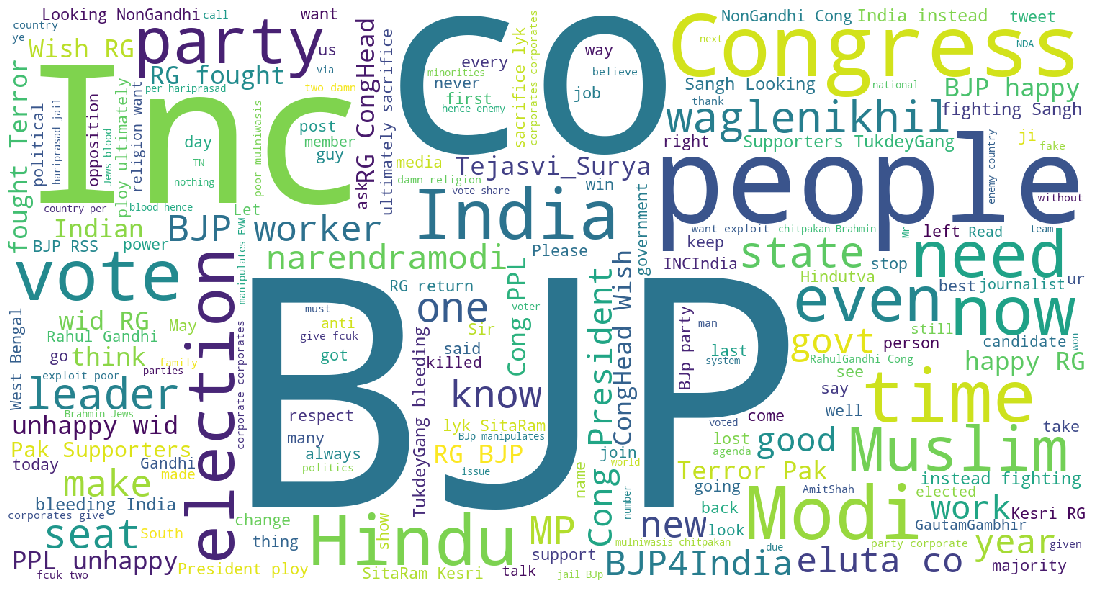

In [0]:
plt.figure(figsize = (20,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [0]:
def strip_punctuation(word):
    for i in punctuation_chars:
        word = word.replace(i,'')
    return word

def get_neg(s):
#     s = s.split(' ')
    n_list = []
    c=0
    for i in s:
        if strip_punctuation(i) in negative_words:
            c += 1
            n_list.append(strip_punctuation(i))
    return c,n_list

def get_pos(s):
#     s = s.split(' ')
    p_list = []
    c=0
    for i in s:
        if strip_punctuation(i) in positive_words:
            c += 1
            p_list.append(strip_punctuation(i))
    return c,p_list


In [0]:
from google.colab import files
uploaded = files.upload() 

Saving positive-words.txt to positive-words.txt


In [0]:
from google.colab import files
uploaded = files.upload() 

Saving negative-words.txt to negative-words.txt


In [0]:
# lists of words to use
positive_words = []
with open("positive-words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())

negative_words = []
with open("negative-words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

In [0]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
p_score,p_list = get_pos(words)
n_score,n_list = get_neg(words)
net_score = p_score - n_score
f_str = 'Postive score = {}, Negative score = {}, Net score = {}'.format(p_score,n_score,net_score)

In [0]:
f_str

'Postive score = 910, Negative score = 1000, Net score = -90'

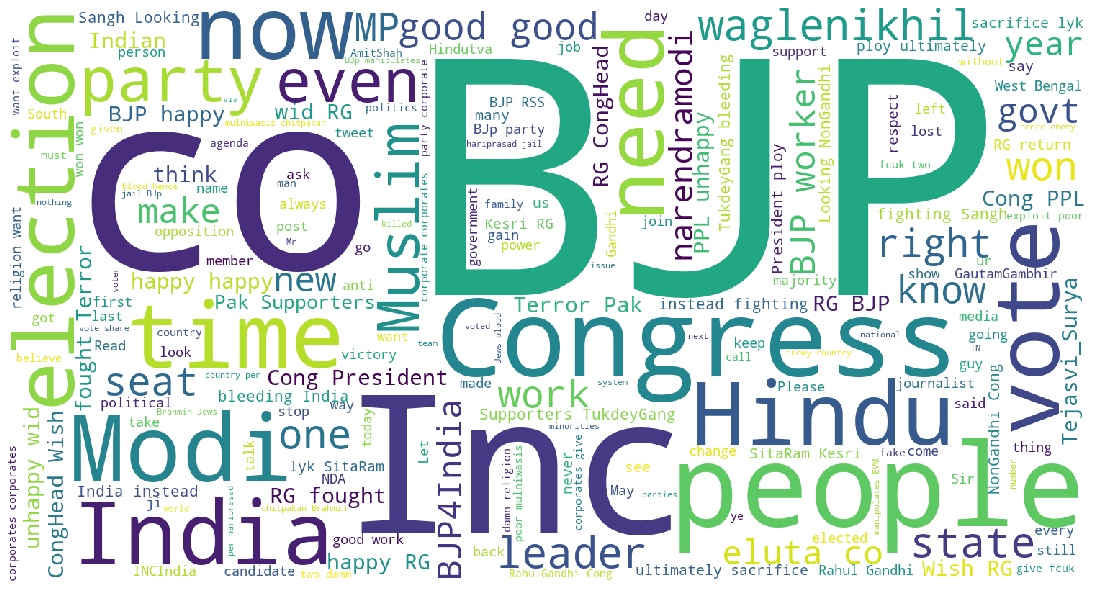

In [0]:
for i in p_list:
        sentence = sentence + i + ' '
        
wordcloud = WordCloud(width = 1500, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size=10).generate(sentence)

plt.figure(figsize = (15,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
wordcloud.to_file("postive_tweetWords.png")

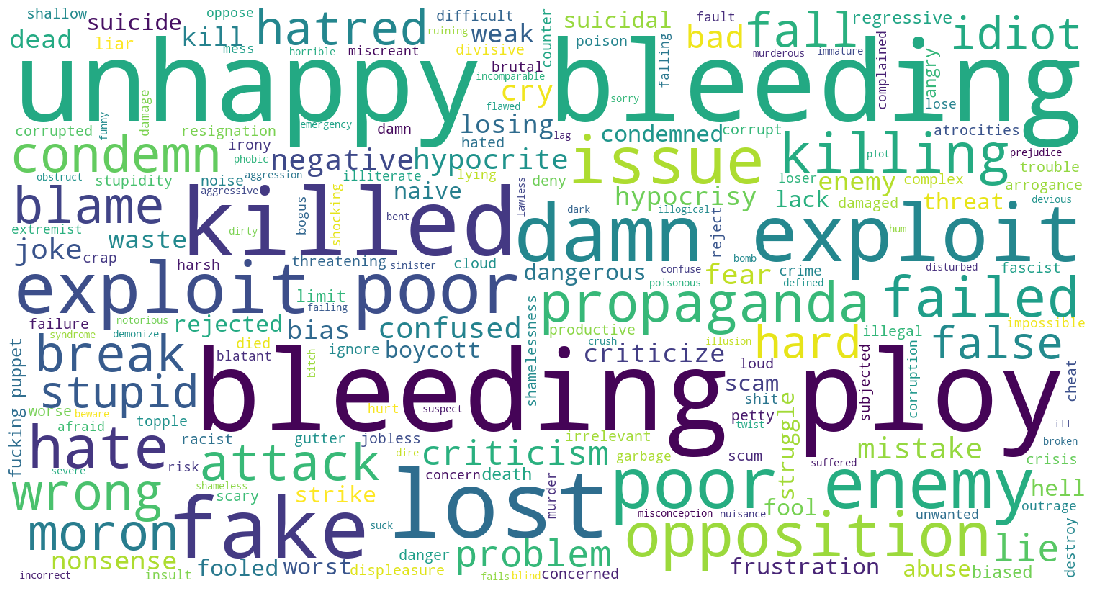

In [0]:
sentence = ''
for i in n_list:
        sentence = sentence + i + ' '
        
wordcloud = WordCloud(width = 1500, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size=10).generate(sentence)

plt.figure(figsize = (15,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
wordcloud.to_file("negative_tweetWords.png")